### Imports

In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from pyproj import Proj

In [35]:
INPUT_DIR = '../../data/chelonioidea'
INPUT_CSV = 'sea_turtles_australia.csv'

### Data Exploration

In [36]:
sea_turtles = pd.read_csv(os.path.join(INPUT_DIR, INPUT_CSV))

In [37]:
sea_turtles.head()

,species,locality,occurrenceStatus,decimalLatitude,decimalLongitude,eventDate,year,taxonKey,speciesKey
0,Lepidochelys olivacea,WOONGARRA:OAKS,present,-24.7705,152.4182,12/31/1997 19:00,1998,2442153,2442153
1,Natator depressus,WOONGARRA:RIFLERANGE CK,present,-24.8483,152.4683,12/31/1996 19:00,1997,2442173,2442173
2,Natator depressus,WOONGARRA:NEILSON PK,present,-24.8060,152.4548,12/31/1974 19:00,1975,2442173,2442173
3,Lepidochelys olivacea,ZUNA ISLAND,present,-10.7191,142.2930,12/31/1998 19:00,1999,2442153,2442153
4,Caretta caretta,WOONGARRA:RIFLERANGE CK,present,-24.8483,152.4683,12/31/1997 19:00,1998,8894817,8894817


### Data Cleaning

In [53]:
# rename columns
sea_turtles.columns = ['species', 'locality', 'status', 'latitude', 'longitude', 'date', 'year', 'taxonKey', 'speciesKey']

# remove nans
sea_turtles = sea_turtles[sea_turtles['longitude'].isna() == False]

### Visualizing with GeoPandas

In [54]:
sea_turtles_gdf = gpd.GeoDataFrame(
    sea_turtles,
    geometry=gpd.points_from_xy(sea_turtles['longitude'], sea_turtles['latitude']))

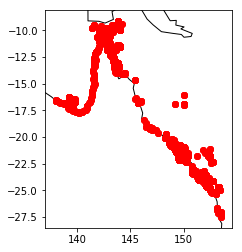

In [55]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent=='Oceania'].plot(color='white', edgecolor='black')
ax.set_xlim([sea_turtles.longitude.min()-1, sea_turtles.longitude.max()+1])
ax.set_ylim([sea_turtles.latitude.min()-1, sea_turtles.latitude.max()+1])
sea_turtles_gdf.plot(ax=ax, color='red')
plt.show()

### Viusualizing with folium

In [63]:
latitudes = sea_turtles['latitude'].tolist()
longitudes = sea_turtles['longitude'].tolist()

sea_turtle_map = folium.Map(location=[-20, 146], zoom_start=4)

for i in range(100, 200):
    coords = [latitudes[i], longitudes[i]]
    folium.Marker(coords, popup='occurence').add_to(sea_turtle_map)
    
sea_turtle_map